# Введение

Объект исследования - незастроенный участок на территории Пудомягского сельского поселения (Гатчинский район, Ленинградская область, Россия).

Суть первой гипотезы заключается в планомерном развитии территории с акцентом на перезапуск уже существующих населенных пунктов – деревень Пудомяги и Корпикюля. Минимальный фрагмент южной территории участка отдается под застройку малоэтажным многоквартирным жильем и сопутствующей инфраструктурой. В данной гипотезе важна взаимная интеграция жилой и общественной функций посредством планировки.

# Подготовка данных

In [ ]:
!pip install blocksnet ipykernel -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.1/255.1 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [ ]:
!pip install mapclassify -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.5 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd

In [ ]:
import osmnx as ox

**Загрузка кварталов территории**

In [ ]:
blocks = gpd.read_file('blocks.geojson')

In [ ]:
blocks = blocks.explode(index_part=True).reset_index(drop=True)

<ipython-input-15-22b43d010506>:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  blocks = blocks.explode(index_part=True).reset_index(drop=True)


In [ ]:
blocks

,fid,площадь,geometry
0,1,245650,"POLYGON ((346623.030 6610712.490, 346664.990 6..."
1,2,88065,"POLYGON ((346129.832 6611304.750, 346144.103 6..."
2,3,207923,"POLYGON ((347122.993 6610255.428, 347144.115 6..."
3,4,304315,"POLYGON ((347456.726 6609919.567, 347471.714 6..."
4,5,800322,"POLYGON ((347312.231 6610598.844, 348139.273 6..."
5,6,355553,"POLYGON ((348621.556 6611860.812, 348629.309 6..."
6,7,123096,"POLYGON ((347312.231 6610598.844, 347308.043 6..."
7,8,318314,"POLYGON ((346514.378 6611488.920, 346525.493 6..."
8,9,185986,"POLYGON ((346664.990 6610812.602, 346665.611 6..."
9,10,71832,"POLYGON ((346862.226 6610254.161, 346888.329 6..."


In [ ]:
blocks.explore()

**Загрузка дорог территории**

In [ ]:
roads = gpd.read_file('highway_only.geojson')

<Axes: >

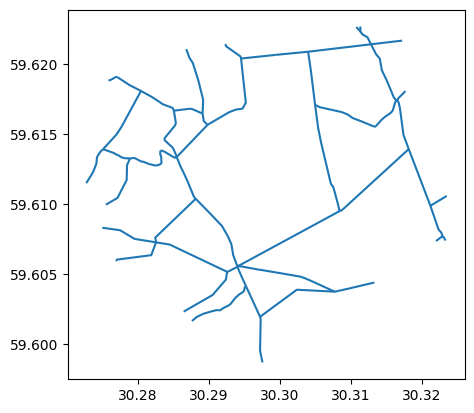

In [ ]:
roads.plot()

In [ ]:
local_crs = blocks.estimate_utm_crs()

In [ ]:
blocks = blocks.reset_index()[['geometry']].to_crs(local_crs)
roads = roads.reset_index()[['geometry']].to_crs(local_crs)

In [ ]:
roads = roads[roads.geom_type.isin(['LineString', 'MultiLineString'])]

In [ ]:
import momepy
GAP_TOLERANCE = 1
def _get_roads(roads):
    merged = roads.unary_union
    if merged.geom_type == 'MultiLineString':
        roads = gpd.GeoDataFrame(geometry=list(merged.geoms), crs=roads.crs)
    else:
        roads = gpd.GeoDataFrame(geometry=[merged], crs=roads.crs)
    roads = roads.explode(index_parts=False).reset_index(drop=True)
    roads.geometry = momepy.close_gaps(roads, GAP_TOLERANCE)
    roads = roads[roads.geom_type.isin(['LineString'])]
    return roads

roads = _get_roads(roads)
roads

,geometry
0,"LINESTRING (348965.225 6610733.631, 348959.337..."
1,"LINESTRING (348944.249 6610765.425, 348936.036..."
2,"LINESTRING (347471.874 6609825.226, 347472.019..."
3,"LINESTRING (347472.019 6609825.230, 347472.164..."
4,"LINESTRING (348944.249 6610765.425, 348935.691..."
5,"LINESTRING (348856.957 6611014.131, 348704.060..."
6,"LINESTRING (348704.060 6611467.731, 348666.028..."
7,"LINESTRING (348629.309 6611859.908, 348632.421..."
8,"LINESTRING (346925.074 6610176.807, 346963.689..."
9,"LINESTRING (347365.032 6610437.402, 347365.032..."


In [ ]:
roads.explore()

# Оценка доступности и связности кварталов

In [ ]:
CRS = 32636
SPEED_M_MIN = 1000

import networkx as nx

def _roads_to_graph(roads):
    graph = momepy.gdf_to_nx(roads)
    graph.graph['crs'] = roads.crs.to_epsg()
    graph = nx.DiGraph(graph)
    for _, _, data in graph.edges(data=True):
        geometry = data['geometry']
        data['time_min'] = geometry.length / SPEED_M_MIN
        # data['weight'] = data['mm_len'] / 1000 / 1000
        # data['length_meter'] = data['mm_len'] / 1000
    for n, data in graph.nodes(data=True):
        graph.nodes[n]['x'] = n[0]  # Assign X coordinate to node
        graph.nodes[n]['y'] = n[1]

    return graph

roads_G = _roads_to_graph(roads)
roads_G

In [ ]:
from blocksnet import AccessibilityProcessor
AccessibilityProcessor._fix_graph(roads_G)

In [ ]:
from blocksnet import AccessibilityProcessor

ap = AccessibilityProcessor(blocks)
acc_mx = ap.get_accessibility_matrix(roads_G)
acc_mx.head()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000000,2.654297,1.020508,1.020508,1.511719,1.511719,1.020508,1.240234,1.103516,0.750977,1.500977,1.959961,1.959961,2.351562,2.380859,1.751953
1,2.654297,0.000000,2.507812,2.507812,2.984375,2.984375,2.507812,1.415039,1.898438,2.238281,2.294922,1.404297,1.404297,0.861816,3.855469,0.902832
2,1.020508,2.507812,0.000000,0.000000,1.364258,1.364258,0.000000,1.092773,1.149414,0.269287,1.546875,1.812500,1.812500,2.203125,2.234375,1.604492
3,1.020508,2.507812,0.000000,0.000000,1.364258,1.364258,0.000000,1.092773,1.149414,0.269287,1.546875,1.812500,1.812500,2.203125,2.234375,1.604492
4,1.511719,2.984375,1.364258,1.364258,0.000000,0.000000,1.364258,1.570312,1.640625,1.094727,2.037109,2.291016,2.291016,2.681641,0.870117,2.082031


In [ ]:
acc_mx.to_pickle('acc_mx.pickle')

In [ ]:
from blocksnet.models import City

blocks['land_use'] = None

city = City(
    blocks=blocks,
    acc_mx=acc_mx
)

In [ ]:
print(city)

CRS : EPSG:32636
Blocks : 16
Service types : 0/66
Buildings : 0
Services : 0



In [ ]:
city.to_pickle('city_model.pickle')

In [ ]:
from blocksnet import Accessibility, Connectivity

In [ ]:
accessibility = Accessibility(city_model=city)
block = city[4] # квартал, которого считаем доступность
result = accessibility.calculate(block)

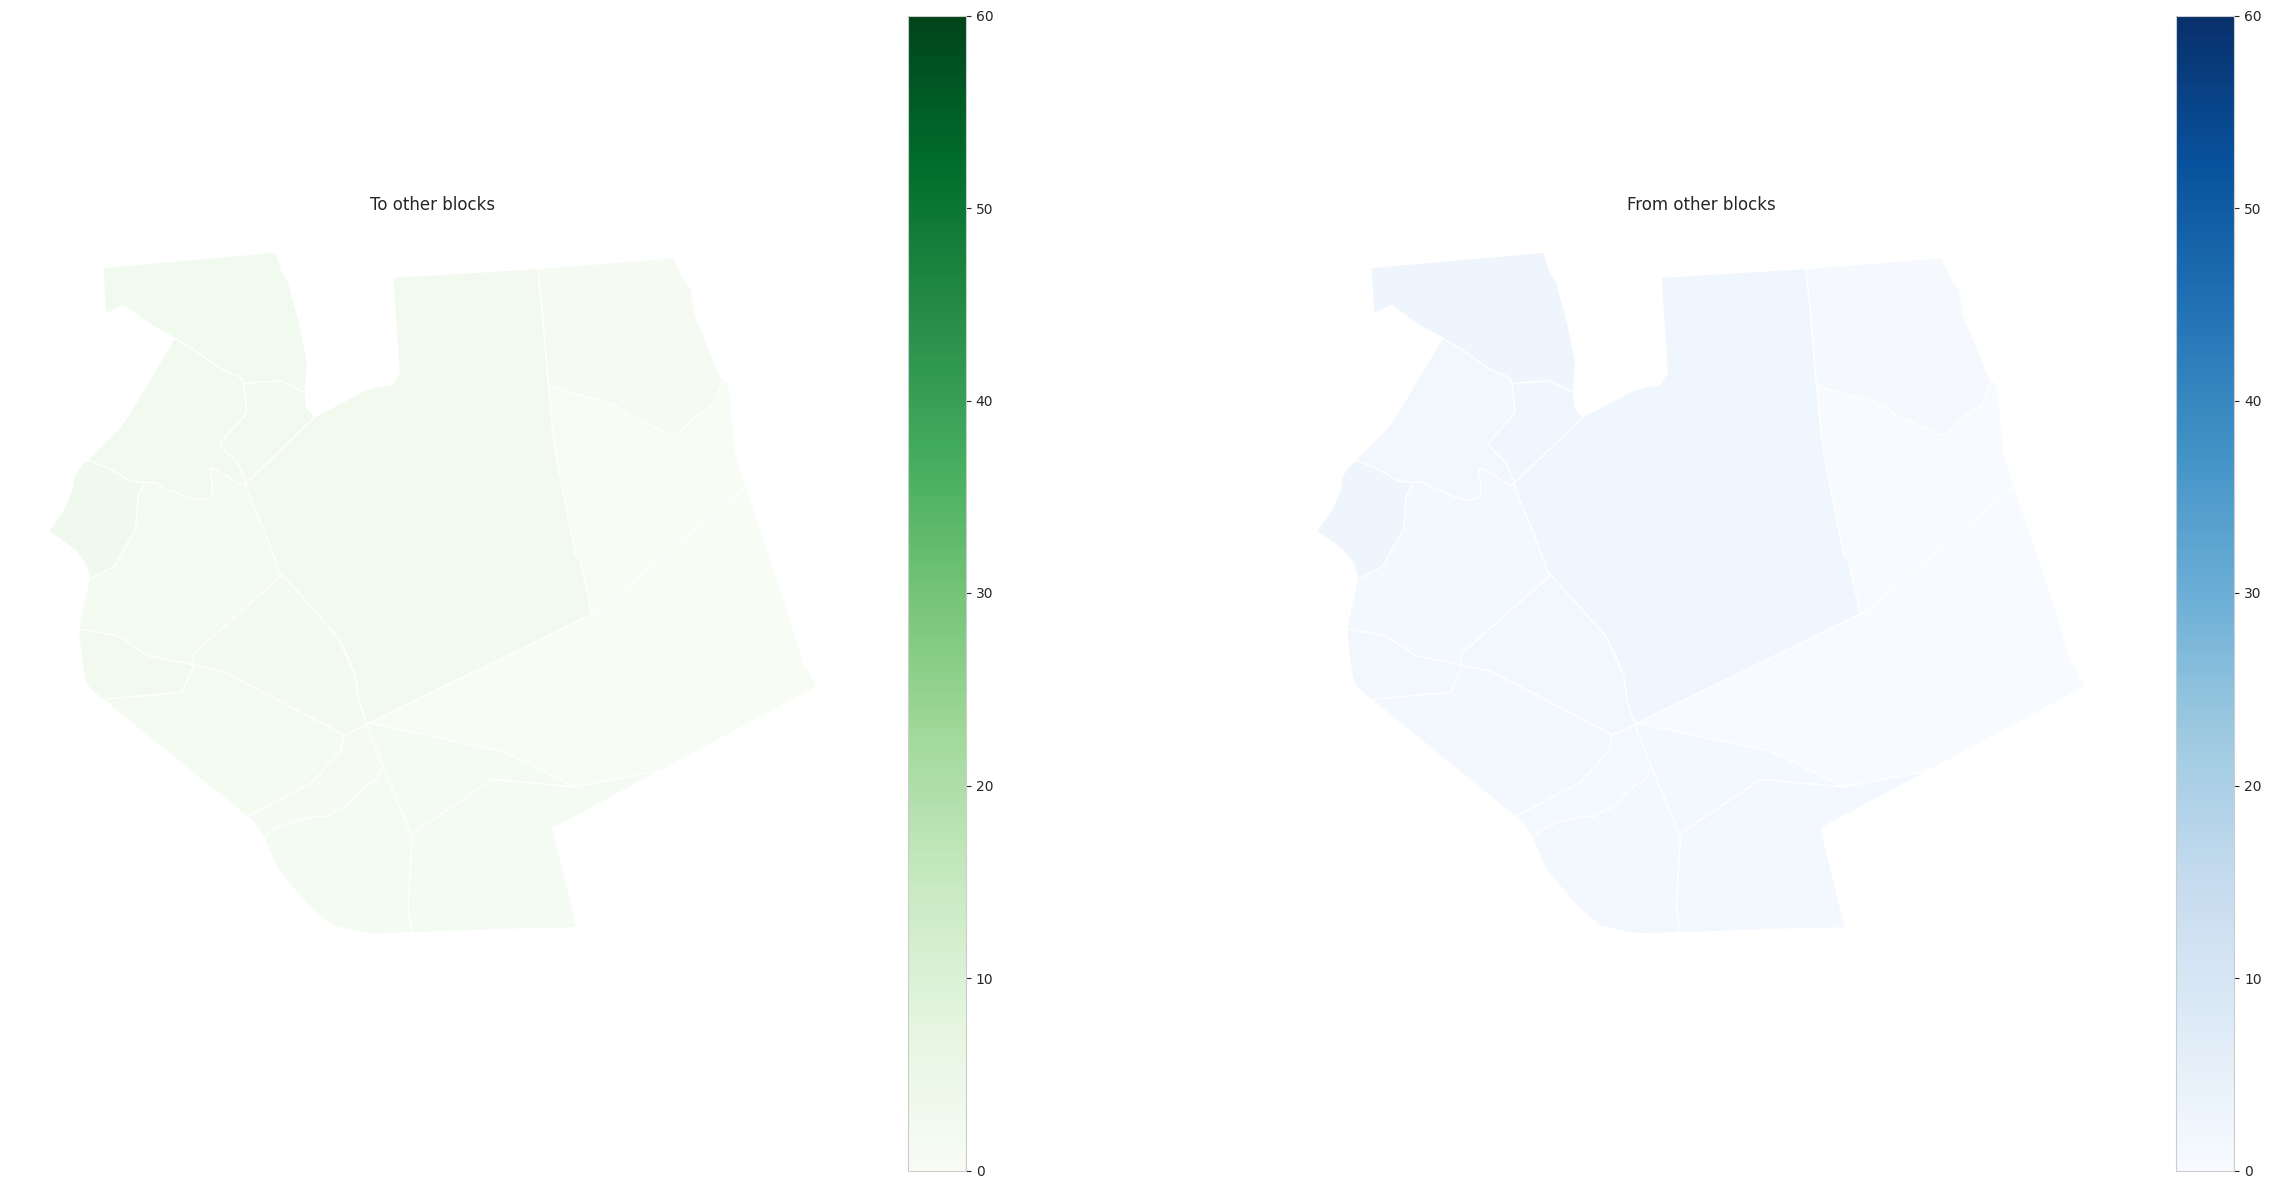

In [ ]:
Accessibility.plot(result, linewidth=0.9, figsize=(30,15))

In [ ]:
result.to_file('accessibility_1.geojson')

In [ ]:
connectivity = Connectivity(city_model=city)
connectivity_result = connectivity.calculate()
connectivity_result

,geometry,connectivity
id,,
0,"POLYGON ((346623.030 6610712.490, 346664.990 6...",1.505859
1,"POLYGON ((346129.832 6611304.750, 346144.103 6...",2.265625
2,"POLYGON ((347122.993 6610255.428, 347144.115 6...",1.364258
3,"POLYGON ((347456.726 6609919.567, 347471.714 6...",1.364258
4,"POLYGON ((347312.231 6610598.844, 348139.273 6...",1.541016
5,"POLYGON ((348621.556 6611860.812, 348629.309 6...",1.541016
6,"POLYGON ((347312.231 6610598.844, 347308.043 6...",1.364258
7,"POLYGON ((346514.378 6611488.920, 346525.493 6...",1.092773
8,"POLYGON ((346664.990 6610812.602, 346665.611 6...",1.149414


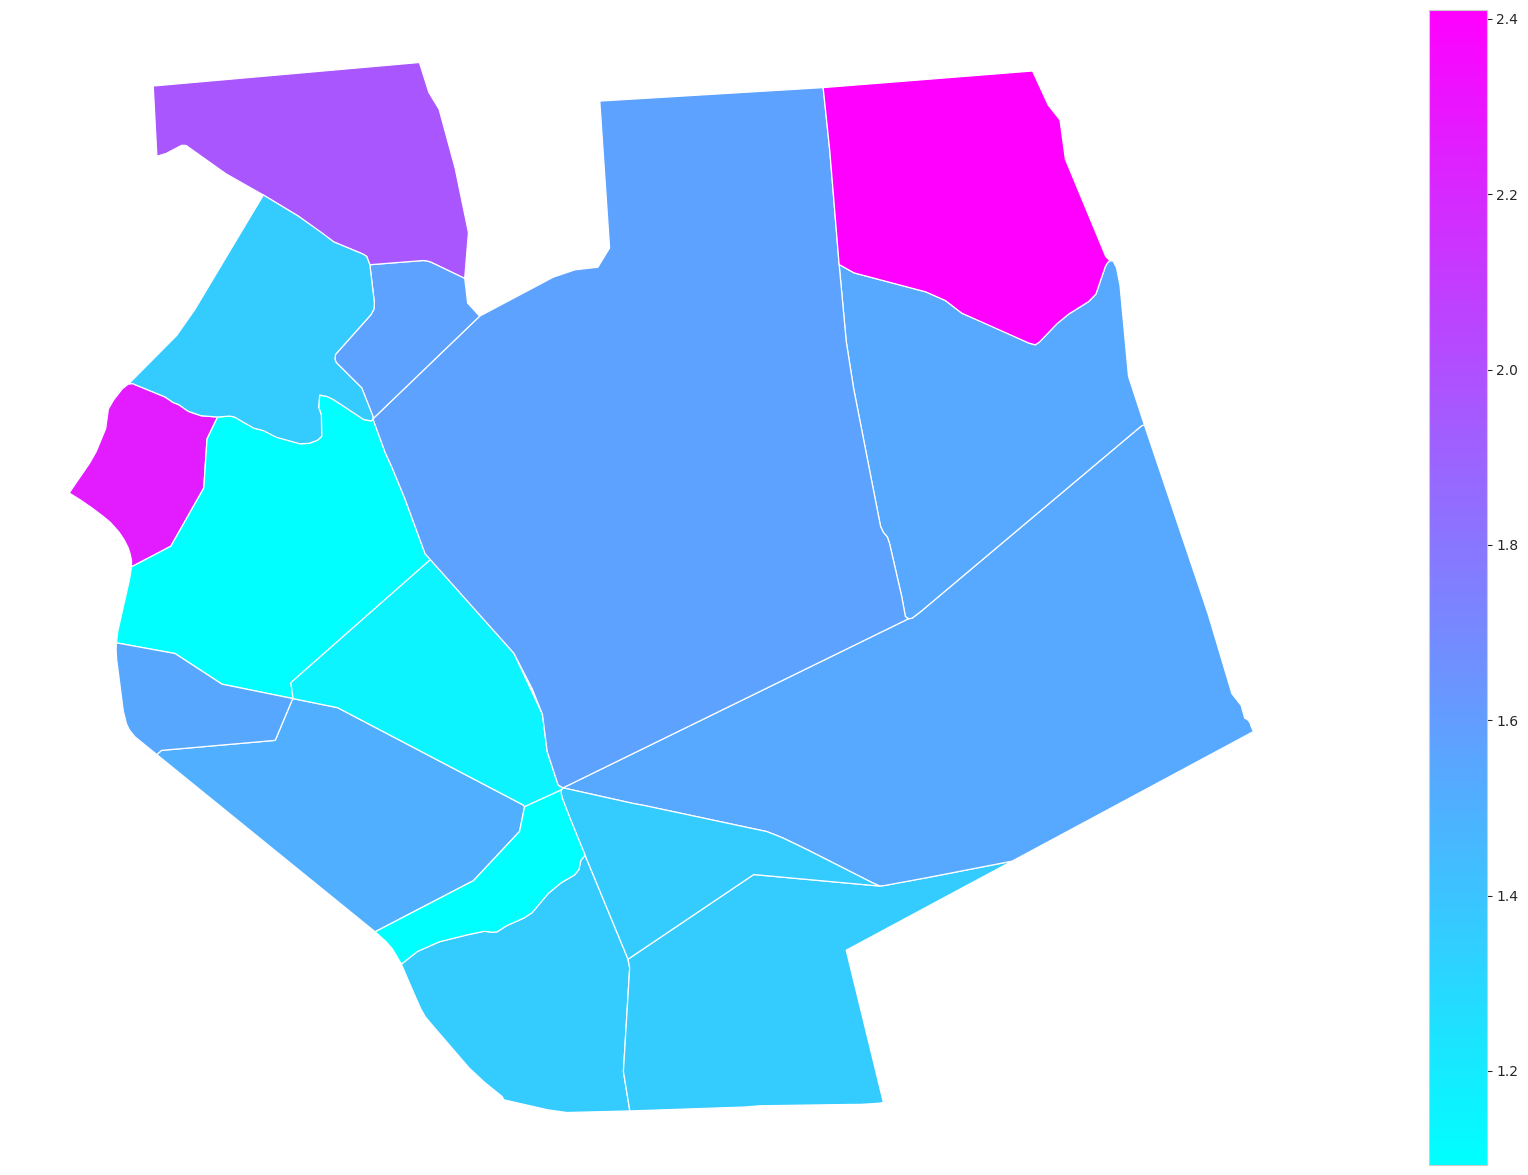

In [ ]:
Connectivity.plot(connectivity_result, linewidth=0.9, figsize=(30,15))

In [ ]:
result.to_file('connectivity_1.geojson')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

In [ ]:
accessibility_matrix = pd.read_pickle('acc_mx.pickle')

In [ ]:
Pudo = City.from_pickle('city_model.pickle')

# Оценка сервисного наполнения территории

**Загрузка зданий территории**

In [ ]:
buildings = gpd.read_file('buildings_1.geojson')

In [ ]:
local_crs = buildings.estimate_utm_crs()
local_crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
buildings = buildings.to_crs(local_crs)
buildings.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
buildings = buildings[buildings.geometry.type.isin(['Polygon', 'MultiPolygon'])]
buildings.head()

,fid,index,population,number_of_floors,capacity,footprint_area,build_floor_area,living_area,non_living_area,service,geometry
0,110,110,64,4,None,1569.698,6278.792,1255.758,5023.034,None,"MULTIPOLYGON (((347489.632 6610127.896, 347489..."
1,111,111,64,4,None,1569.700,6278.800,1255.760,5023.040,None,"MULTIPOLYGON (((347616.049 6610209.488, 347616..."
2,112,112,64,4,None,1569.701,6278.804,1255.761,5023.043,None,"MULTIPOLYGON (((347679.257 6610250.284, 347679..."
3,113,113,64,4,None,1569.699,6278.796,1255.759,5023.037,None,"MULTIPOLYGON (((347576.084 6609904.426, 347545..."
4,114,114,64,4,None,1569.700,6278.800,1255.760,5023.040,None,"MULTIPOLYGON (((347726.543 6609903.712, 347695..."


In [ ]:
buildings = buildings.reset_index(drop=True)
buildings.head()

,fid,index,population,number_of_floors,capacity,footprint_area,build_floor_area,living_area,non_living_area,service,geometry
0,110,110,64,4,None,1569.698,6278.792,1255.758,5023.034,None,"MULTIPOLYGON (((347489.632 6610127.896, 347489..."
1,111,111,64,4,None,1569.700,6278.800,1255.760,5023.040,None,"MULTIPOLYGON (((347616.049 6610209.488, 347616..."
2,112,112,64,4,None,1569.701,6278.804,1255.761,5023.043,None,"MULTIPOLYGON (((347679.257 6610250.284, 347679..."
3,113,113,64,4,None,1569.699,6278.796,1255.759,5023.037,None,"MULTIPOLYGON (((347576.084 6609904.426, 347545..."
4,114,114,64,4,None,1569.700,6278.800,1255.760,5023.040,None,"MULTIPOLYGON (((347726.543 6609903.712, 347695..."


In [ ]:
for colums in buildings.columns:
  print(colums)

fid
index
population
number_of_floors
capacity
footprint_area
build_floor_area
living_area
non_living_area
service
geometry


In [ ]:
Pudo.update_buildings(buildings) # загрузка зданий в модель

2024-12-23 20:12:41.321 | INFO     | blocksnet.models.city:update_buildings:1237 - Removing existing blocks from the model
2024-12-23 20:12:41.324 | INFO     | blocksnet.models.city:update_buildings:1241 - Joining buildings and blocks
Update blocks buildings: 100%|██████████| 2/2 [00:00<00:00, 161.45it/s]


,fid,index,population,number_of_floors,capacity,footprint_area,build_floor_area,living_area,non_living_area,service,geometry


In [ ]:
Pudo.get_buildings_gdf() # проверим результат

,block_id,geometry,population,footprint_area,build_floor_area,living_area,non_living_area,number_of_floors,is_living
id,,,,,,,,,
37,2,"POLYGON ((347406.110 6609850.411, 347454.826 6...",0,613.084071,280.000,0.000,280.000,1,False
31,2,"POLYGON ((347356.435 6610352.391, 347376.216 6...",0,613.084071,400.000,0.000,400.000,1,False
38,2,"POLYGON ((347357.394 6609848.145, 347406.110 6...",0,613.084071,70.000,0.000,70.000,1,False
30,2,"POLYGON ((347376.216 6610307.814, 347395.996 6...",0,613.084071,75.000,0.000,75.000,1,False
41,2,"POLYGON ((347313.745 6609839.220, 347265.269 6...",0,613.084071,15.000,0.000,15.000,1,False
19,2,"POLYGON ((347363.302 6609917.110, 347317.372 6...",64,1569.337249,6278.784,1255.757,5023.027,4,True
27,2,"POLYGON ((347124.207 6610144.605, 347114.353 6...",64,1569.337249,6278.772,1255.754,5023.018,4,True
26,2,"POLYGON ((347193.117 6610174.788, 347183.971 6...",64,1569.337249,6278.776,1255.755,5023.021,4,True
22,2,"POLYGON ((347370.688 6610142.702, 347324.358 6...",64,1569.337249,6278.784,1255.757,5023.027,4,True


**Загрузка сервисов территории**

In [ ]:
bus_stop = gpd.read_file('bus_stop_1.geojson')

In [ ]:
bus_stop = bus_stop.to_crs(local_crs)
bus_stop.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
bus_stop_geometry = bus_stop[['geometry']]
Pudo.update_services('bus_stop', bus_stop_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf.head()

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (347290.205 6609848.130),2,41,bus_stop,4,7.0,False


In [ ]:
cafe = gpd.read_file('cafe_1.geojson')

In [ ]:
cafe = cafe.to_crs(local_crs)
cafe.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
cafe_geometry = cafe[['geometry']]
Pudo.update_services('cafe', cafe_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf.head()

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (347430.751 6609845.264),2,37,cafe,65,280.0,False
1,POINT (347290.205 6609848.130),2,41,bus_stop,4,7.0,False


In [ ]:
hairdresser = gpd.read_file('hairdresser_1.geojson')

In [ ]:
hairdresser = hairdresser.to_crs(local_crs)
hairdresser.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
hairdresser_geometry = hairdresser[['geometry']]
Pudo.update_services('hairdresser', hairdresser_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf.head()

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (347430.751 6609845.264),2,37,cafe,65,280.0,False
1,POINT (347290.205 6609848.130),2,41,bus_stop,4,7.0,False
2,POINT (347975.003 6609878.788),3,42,hairdresser,20,600.0,False


In [ ]:
kindergarten = gpd.read_file('kindergarden_1.geojson')

In [ ]:
kindergarten = kindergarten.to_crs(local_crs)
kindergarten.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
kindergarten_geometry = kindergarten[['geometry']]
Pudo.update_services('kindergarten', kindergarten_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf.head()

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (347430.751 6609845.264),2,37,cafe,65,280.0,False
1,POINT (347290.205 6609848.130),2,41,bus_stop,4,7.0,False
2,POINT (347975.003 6609878.788),3,42,hairdresser,20,600.0,False
3,POINT (347505.371 6609967.499),3,39,kindergarten,80,230.0,False


In [ ]:
pharmacy = gpd.read_file('pharmacy_1.geojson')

In [ ]:
pharmacy = pharmacy.to_crs(local_crs)
pharmacy.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
pharmacy_geometry = pharmacy[['geometry']]
Pudo.update_services('pharmacy', pharmacy_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf.head()

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (347430.751 6609845.264),2,37,cafe,65,280.0,False
1,POINT (347380.356 6610282.988),2,30,pharmacy,30,40.0,False
2,POINT (347290.205 6609848.130),2,41,bus_stop,4,7.0,False
3,POINT (347975.003 6609878.788),3,42,hairdresser,20,600.0,False
4,POINT (347505.371 6609967.499),3,39,kindergarten,80,230.0,False


In [ ]:
police = gpd.read_file('police_1.geojson')

In [ ]:
police = police.to_crs(local_crs)
police.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
police_geometry = police[['geometry']]
Pudo.update_services('police', police_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf.head()

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (347430.751 6609845.264),2,37,cafe,65,280.0,False
1,POINT (347380.356 6610282.988),2,30,pharmacy,30,40.0,False
2,POINT (347290.205 6609848.130),2,41,bus_stop,4,7.0,False
3,POINT (348023.718 6609881.053),3,43,police,60,700.0,False
4,POINT (347975.003 6609878.788),3,42,hairdresser,20,600.0,False


In [ ]:
polyclinic = gpd.read_file('polyclinic_1.geojson')

In [ ]:
polyclinic = polyclinic.to_crs(local_crs)
polyclinic.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
polyclinic_geometry = polyclinic[['geometry']]
Pudo.update_services('polyclinic', polyclinic_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf.head()

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (347430.751 6609845.264),2,37,cafe,65,280.0,False
1,POINT (347360.576 6610327.565),2,31,polyclinic,100,850.0,False
2,POINT (347380.356 6610282.988),2,30,pharmacy,30,40.0,False
3,POINT (347290.205 6609848.130),2,41,bus_stop,4,7.0,False
4,POINT (348023.718 6609881.053),3,43,police,60,700.0,False


In [ ]:
post = gpd.read_file('post_1.geojson')

In [ ]:
post = post.to_crs(local_crs)
post.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
post_geometry = post[['geometry']]
Pudo.update_services('post', post_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf.head()

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (347430.751 6609845.264),2,37,cafe,65,280.0,False
1,POINT (347360.576 6610327.565),2,31,polyclinic,100,850.0,False
2,POINT (347382.035 6609842.998),2,38,post,400,50.0,False
3,POINT (347380.356 6610282.988),2,30,pharmacy,30,40.0,False
4,POINT (347290.205 6609848.130),2,41,bus_stop,4,7.0,False


In [ ]:
school = gpd.read_file('school_1.geojson')

In [ ]:
school = school.to_crs(local_crs)
school.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
school_geometry = school[['geometry']]
Pudo.update_services('school', school_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf.head(10)

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (347430.751 6609845.264),2,37,cafe,65,280.0,False
1,POINT (347360.576 6610327.565),2,31,polyclinic,100,850.0,False
2,POINT (347382.035 6609842.998),2,38,post,400,50.0,False
3,POINT (347380.356 6610282.988),2,30,pharmacy,30,40.0,False
4,POINT (347290.205 6609848.130),2,41,bus_stop,4,7.0,False
5,POINT (348023.718 6609881.053),3,43,police,60,700.0,False
6,POINT (347975.003 6609878.788),3,42,hairdresser,20,600.0,False
7,POINT (347505.371 6609967.499),3,39,kindergarten,80,230.0,False
8,POINT (347506.134 6610016.262),3,40,school,250,3200.0,False


In [ ]:
supermarket = gpd.read_file('supermarket_1.geojson')

In [ ]:
supermarket = supermarket.to_crs(local_crs)
supermarket.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
supermarket_geometry = supermarket[['geometry']]
Pudo.update_services('supermarket', supermarket_geometry)
services_gdf = Pudo.get_services_gdf()
services_gdf.head(15)

,geometry,block_id,building_id,service_type,capacity,area,is_integrated
0,POINT (347430.751 6609845.264),2,37,cafe,65,280.0,False
1,POINT (347360.576 6610327.565),2,31,polyclinic,100,850.0,False
2,POINT (347382.035 6609842.998),2,38,post,400,50.0,False
3,POINT (347380.356 6610282.988),2,30,pharmacy,30,40.0,False
4,POINT (347290.205 6609848.130),2,41,bus_stop,4,7.0,False
5,POINT (348023.718 6609881.053),3,43,police,60,700.0,False
6,POINT (347975.003 6609878.788),3,42,hairdresser,20,600.0,False
7,POINT (347505.371 6609967.499),3,39,kindergarten,80,230.0,False
8,POINT (347494.330 6610065.246),3,36,supermarket,300,200.0,False
9,POINT (347506.134 6610016.262),3,40,school,250,3200.0,False


**Оценка обеспеченности кварталов сервисами**

In [ ]:
from blocksnet import Provision, ProvisionMethod

2024-12-23 20:40:56.777 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 6 : 2x1
2024-12-23 20:40:56.779 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 20:40:56.789 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 20:40:56.794 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


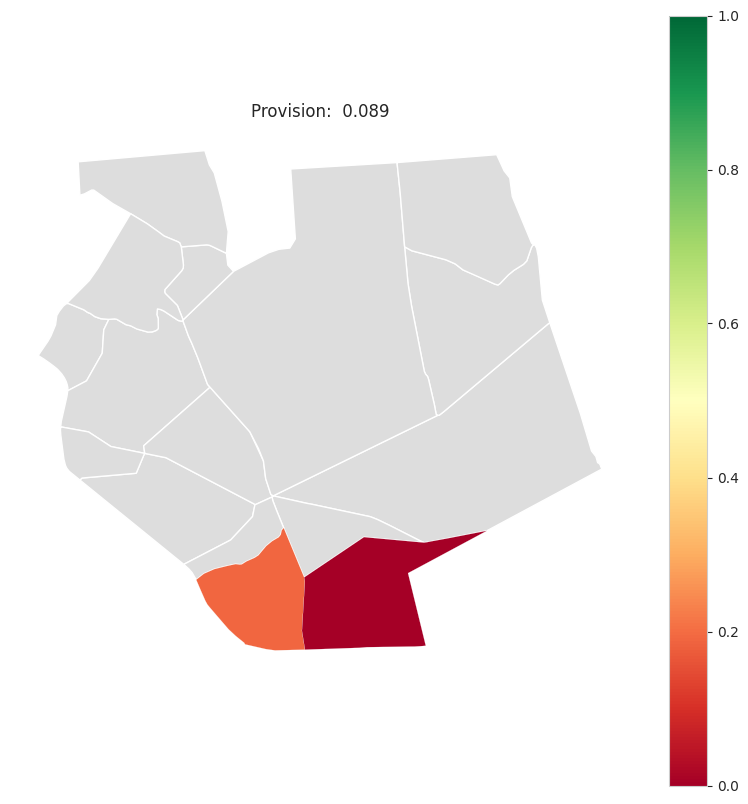

In [ ]:
service_type = 'bus_stop'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 20:41:01.438 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 15 : 2x1
2024-12-23 20:41:01.441 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 20:41:01.451 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 20:41:01.456 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


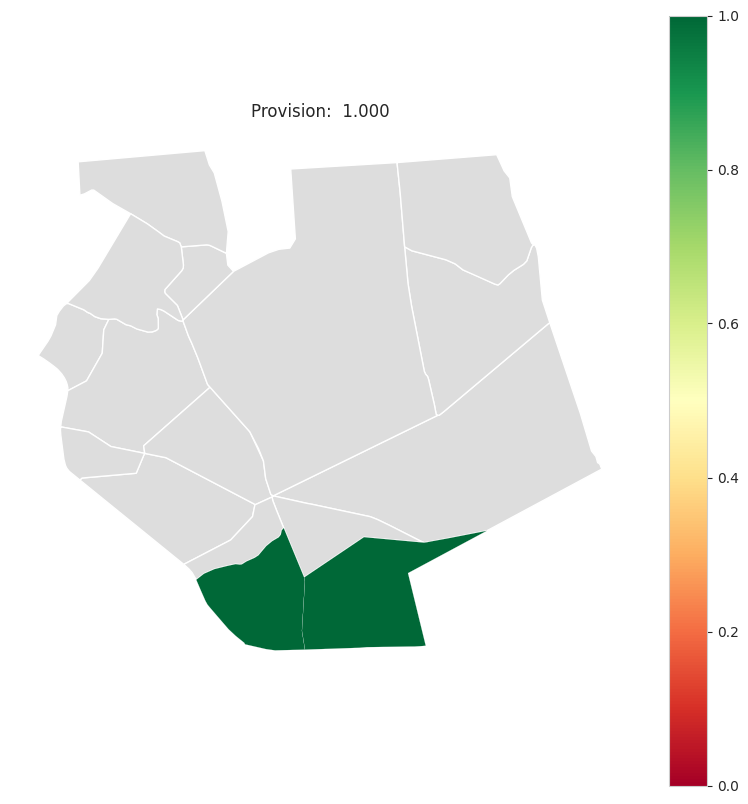

In [ ]:
service_type = 'cafe'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 20:41:05.151 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 15 : 2x1
2024-12-23 20:41:05.154 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 20:41:05.163 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 20:41:05.169 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


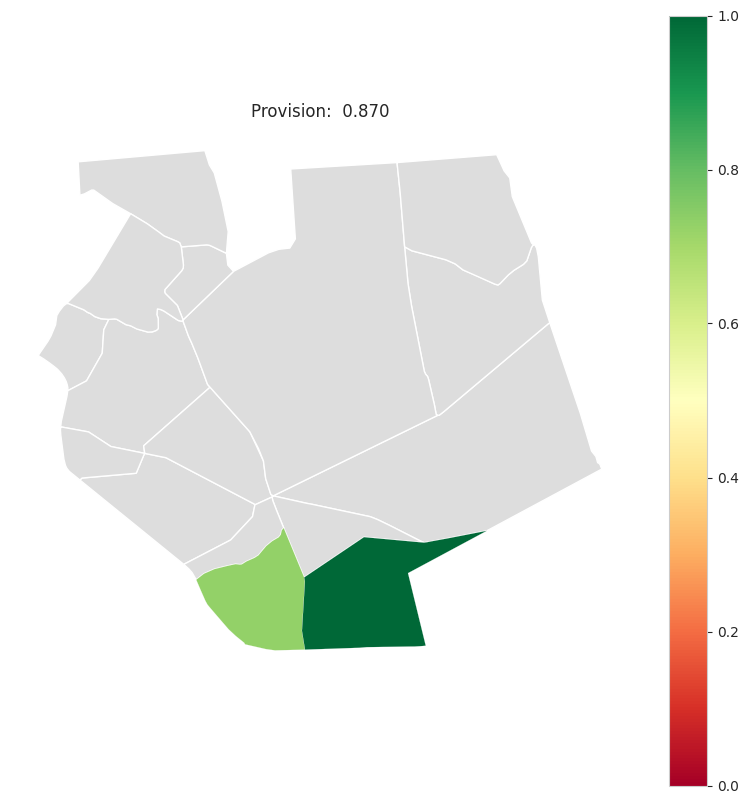

In [ ]:
service_type = 'hairdresser'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 20:41:08.931 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 7 : 2x1
2024-12-23 20:41:08.934 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 20:41:08.944 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 20:41:08.949 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


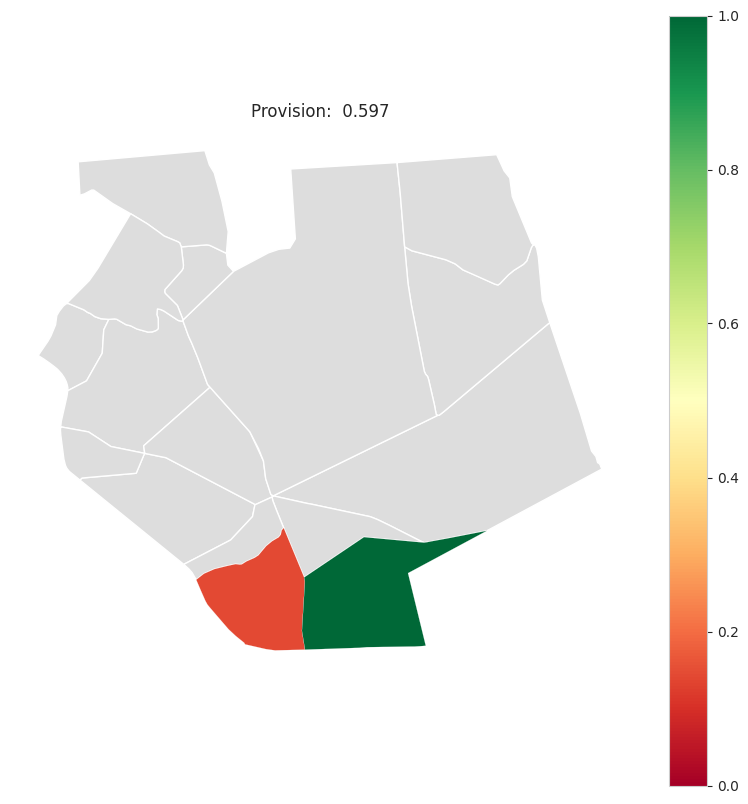

In [ ]:
service_type = 'kindergarten'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 20:41:12.872 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 15 : 2x1
2024-12-23 20:41:12.875 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 20:41:12.884 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 20:41:12.890 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


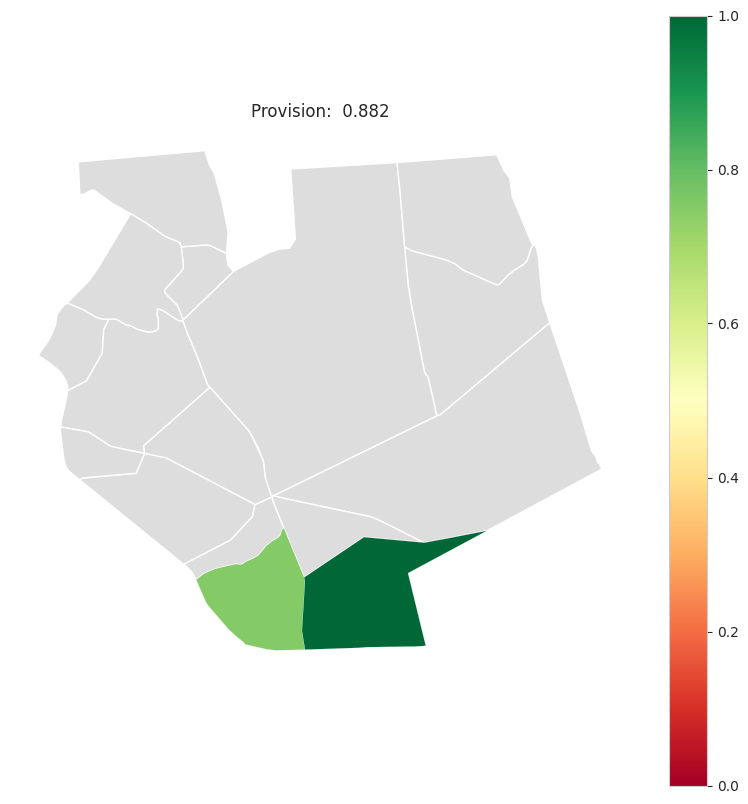

In [ ]:
service_type = 'pharmacy'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 20:41:16.913 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 10 : 2x1
2024-12-23 20:41:16.916 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 20:41:16.926 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 20:41:16.931 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


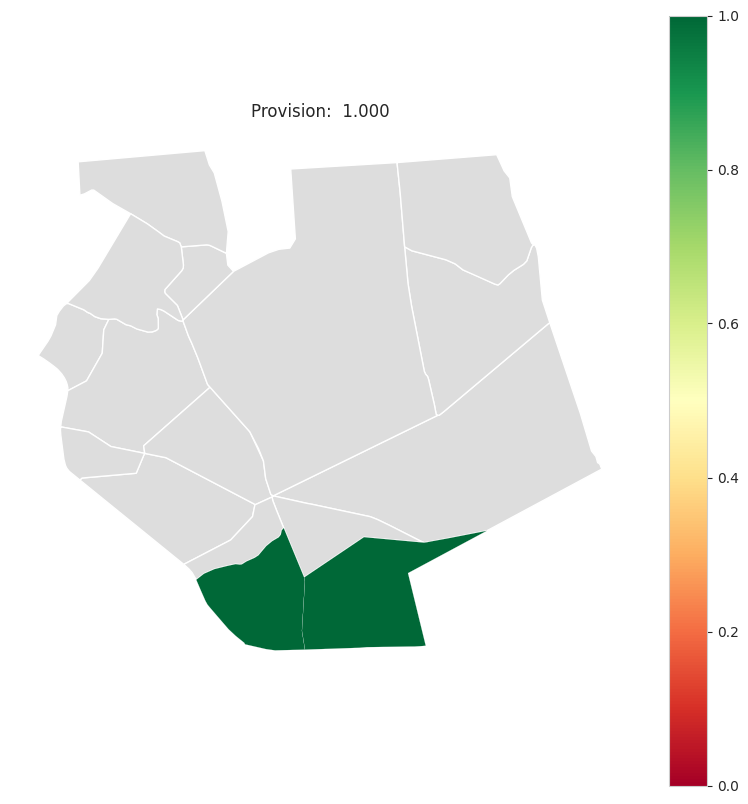

In [ ]:
service_type = 'police'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 20:41:20.821 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 10 : 2x1
2024-12-23 20:41:20.825 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 20:41:20.836 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 20:41:20.843 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


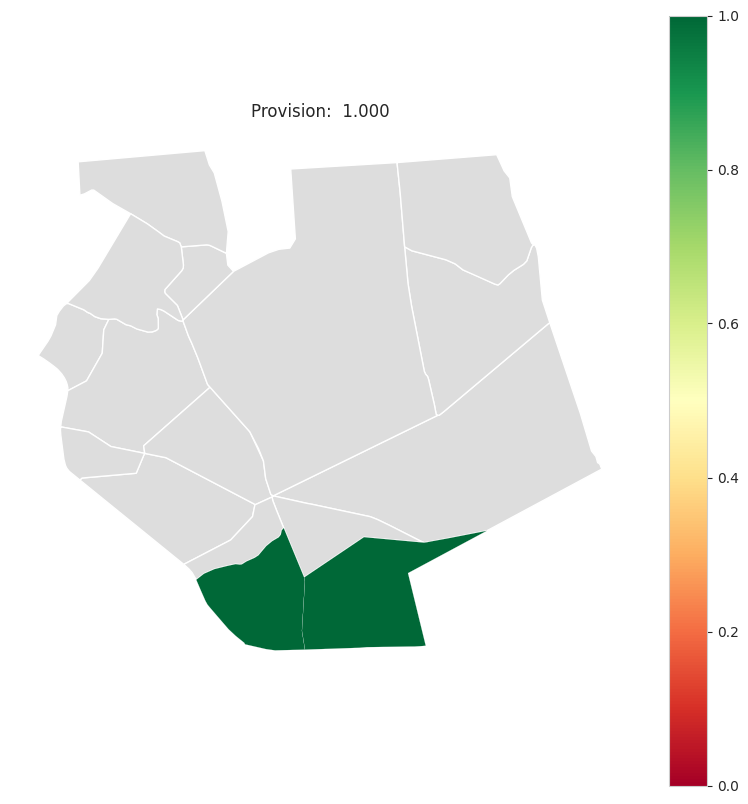

In [ ]:
service_type = 'polyclinic'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 20:41:24.879 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 10 : 2x1
2024-12-23 20:41:24.881 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 20:41:24.892 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 20:41:24.896 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


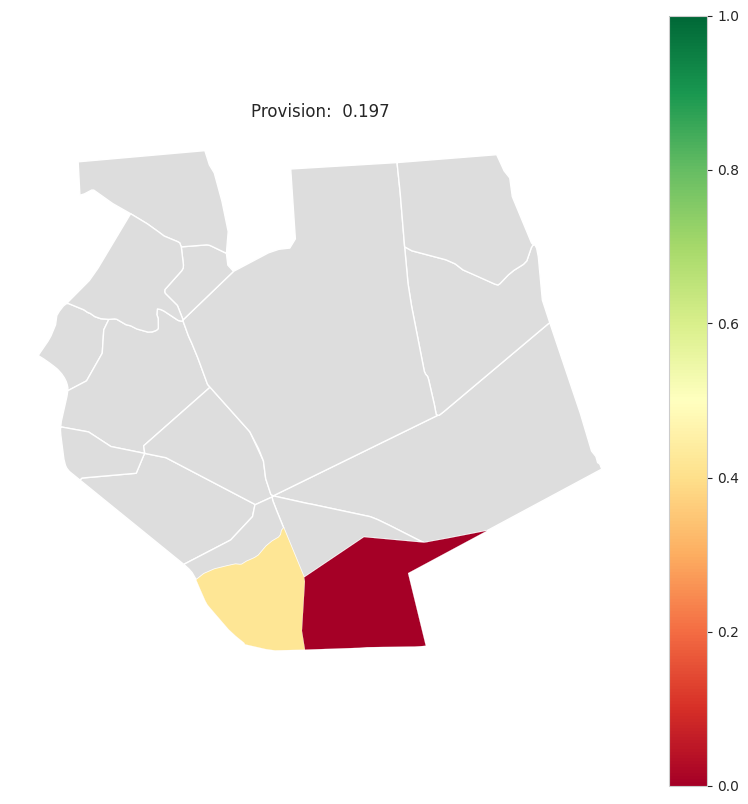

In [ ]:
service_type = 'post'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 20:41:29.002 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 15 : 2x1
2024-12-23 20:41:29.005 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 20:41:29.015 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 20:41:29.021 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


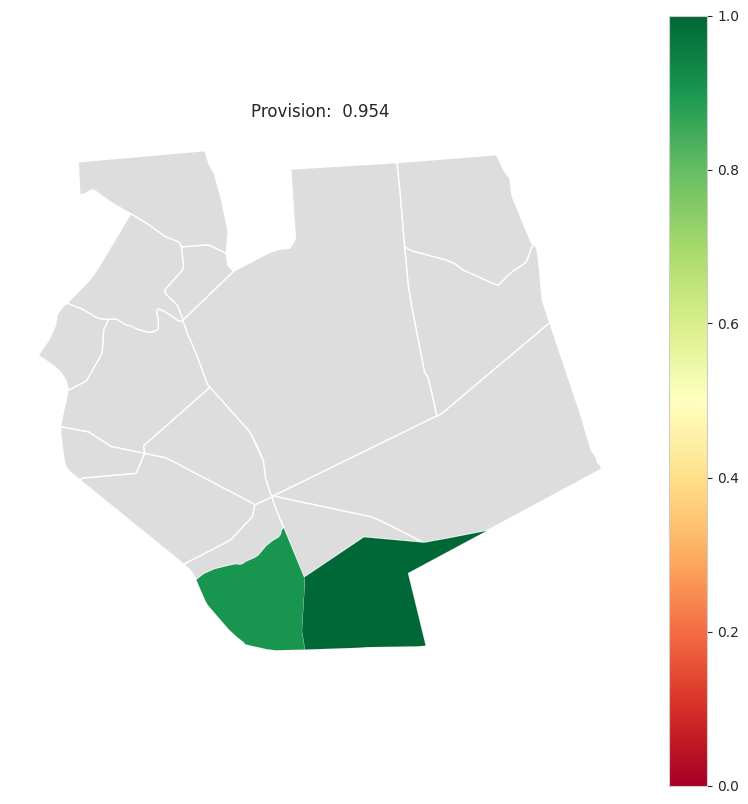

In [ ]:
service_type = 'school'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

2024-12-23 20:41:32.965 | INFO     | blocksnet.method.provision:_lp_provision:320 - Setting an LP problem for accessibility = 15 : 2x1
2024-12-23 20:41:32.972 | INFO     | blocksnet.method.provision:_lp_provision:354 - Solving the problem
2024-12-23 20:41:32.981 | INFO     | blocksnet.method.provision:_lp_provision:358 - Restoring values from variables
2024-12-23 20:41:32.987 | SUCCESS  | blocksnet.method.provision:calculate:269 - Provision assessment finished


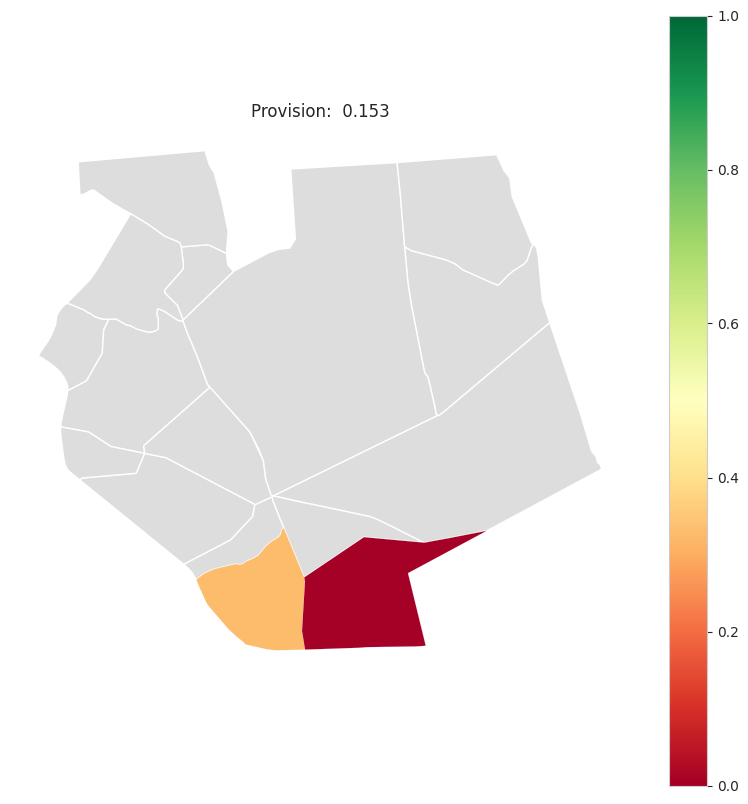

In [ ]:
service_type = 'supermarket'
prov = Provision(city_model=Pudo)
prov_res = prov.calculate(service_type)
prov.plot(prov_res)

**Оценка разнообразия сервисов в кварталах**

In [ ]:
from blocksnet import Diversity

In [ ]:
diversity = Diversity(city_model=Pudo)
result_devirsity = diversity.calculate()

In [ ]:
result_devirsity

,geometry,diversity
id,,
0,"POLYGON ((346623.030 6610712.490, 346664.990 6...",NaN
1,"POLYGON ((346129.832 6611304.750, 346144.103 6...",NaN
2,"POLYGON ((347122.993 6610255.428, 347144.115 6...",1.609438
3,"POLYGON ((347456.726 6609919.567, 347471.714 6...",1.609438
4,"POLYGON ((347312.231 6610598.844, 348139.273 6...",NaN
5,"POLYGON ((348621.556 6611860.812, 348629.309 6...",NaN
6,"POLYGON ((347312.231 6610598.844, 347308.043 6...",NaN
7,"POLYGON ((346514.378 6611488.920, 346525.493 6...",NaN
8,"POLYGON ((346664.990 6610812.602, 346665.611 6...",NaN


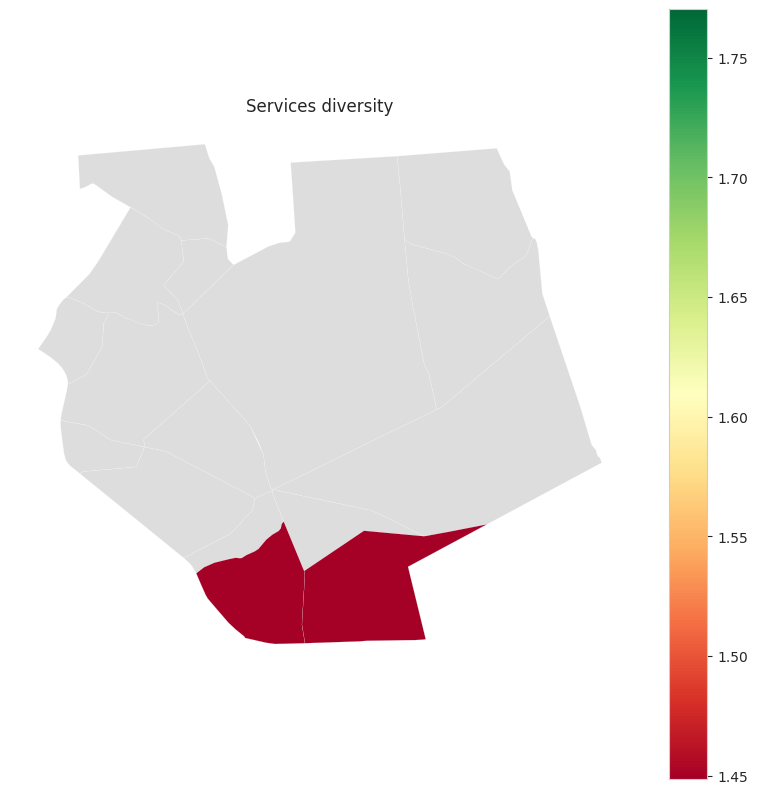

In [ ]:
Diversity.plot(result_devirsity, figsize =(10,10))

**Оценка центральности кварталов**

In [ ]:
from blocksnet import Centrality, PopulationCentrality

In [ ]:
centrality = Centrality(city_model=Pudo)
result_centrality = centrality.calculate()

In [ ]:
result_centrality

,geometry,connectivity,density,diversity,centrality
id,,,,,
0,"POLYGON ((346623.030 6610712.490, 346664.990 6...",1.505859,NaN,NaN,NaN
1,"POLYGON ((346129.832 6611304.750, 346144.103 6...",2.265625,NaN,NaN,NaN
2,"POLYGON ((347122.993 6610255.428, 347144.115 6...",1.364258,0.000024,1.609438,0.402026
3,"POLYGON ((347456.726 6609919.567, 347471.714 6...",1.364258,0.000016,1.609438,0.068693
4,"POLYGON ((347312.231 6610598.844, 348139.273 6...",1.541016,NaN,NaN,NaN
5,"POLYGON ((348621.556 6611860.812, 348629.309 6...",1.541016,NaN,NaN,NaN
6,"POLYGON ((347312.231 6610598.844, 347308.043 6...",1.364258,NaN,NaN,NaN
7,"POLYGON ((346514.378 6611488.920, 346525.493 6...",1.092773,NaN,NaN,NaN
8,"POLYGON ((346664.990 6610812.602, 346665.611 6...",1.149414,NaN,NaN,NaN


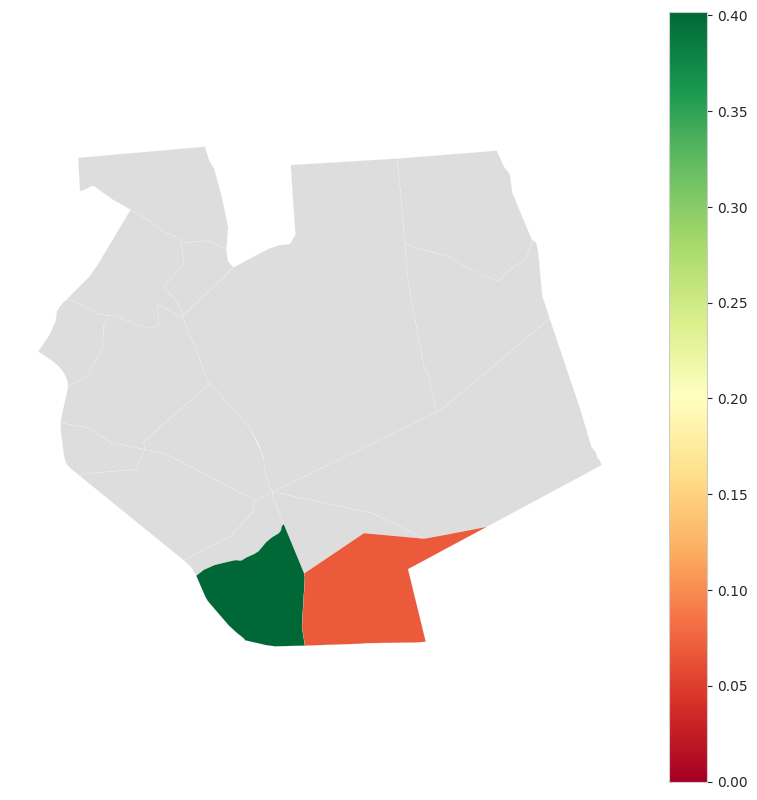

In [ ]:
Centrality.plot(result_centrality, figsize =(10,10))

In [ ]:
centrality_population = PopulationCentrality(city_model=Pudo)

In [ ]:
result_centrlity_population = centrality_population.calculate()

In [ ]:
result_centrlity_population

,geometry,population_centrality
id,,
0,"POLYGON ((346623.030 6610712.490, 346664.990 6...",3.91
1,"POLYGON ((346129.832 6611304.750, 346144.103 6...",3.91
2,"POLYGON ((347122.993 6610255.428, 347144.115 6...",10.00
3,"POLYGON ((347456.726 6609919.567, 347471.714 6...",9.39
4,"POLYGON ((347312.231 6610598.844, 348139.273 6...",1.57
5,"POLYGON ((348621.556 6611860.812, 348629.309 6...",0.78
6,"POLYGON ((347312.231 6610598.844, 347308.043 6...",3.13
7,"POLYGON ((346514.378 6611488.920, 346525.493 6...",5.48
8,"POLYGON ((346664.990 6610812.602, 346665.611 6...",6.26


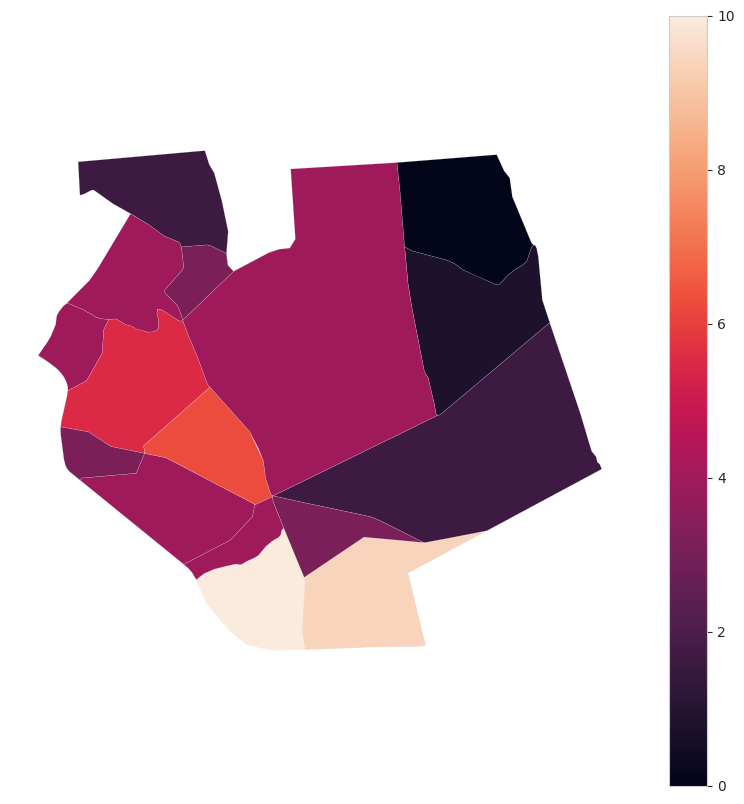

In [ ]:
PopulationCentrality.plot(result_centrlity_population, figsize =(10,10))

# Выводы

Данный сценарий развития территории не может считаться удачным. Несмотря на высокие показатели обеспеченности некоторыми сервисами (школа, медицинские и досуговые учреждения), степень обеспеченности детскими садами и автобусными остановками ниже обозначенного исследователями порога - значение не менее 0,85. Показатель разнообразия сервисов также низок. Развитие новых кварталов согласно этой гипотезе не влечёт повышение обеспеченности сервисами всего Пудомягского сельского поселения.